# Stock Price Predictor

The first step is to load the required modules to make the predictions we need.

In [1]:
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

import sys, os, pdb
import uuid, json, time
import pandas as pd

# import predictions algorithms
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

sys.path.append(os.getcwd() + '/src')
# import main stocks predictor / data preprocessing file
import lib.stocks as st
import lib.visualizer as vzr

#### Configurations & Parameters

Below we set the tickers we would like to train on and the dates for starting predictions.

In [2]:
DATE_TRAIN_START = '2016-01-01'
DATE_TEST_START = '2017-09-01'
DATE_END = '2018-01-01'

WINDOWS = [5, 10]
HORIZONS = [7, 14]

TICKERS_TRAIN = ['AMZN', 'GOOGL', 'AAPL', 'NVDA', 'NFLX']
TICKERS_PREDICT = ['GOOGL', 'AMZN']

The next step is to create a directory where we will save the transformed data. This is done to avoid loading many data files in memeory since our algorithm may apply multiple windows and horizons (a file for each).

Once we've created a directory, we proceed to load a single data representing needed information about all the specified stocks __before__ transformation.

Loading data for AMZN, GOOGL, AAPL, NVDA, NFLX...


<IPython.core.display.Javascript object>


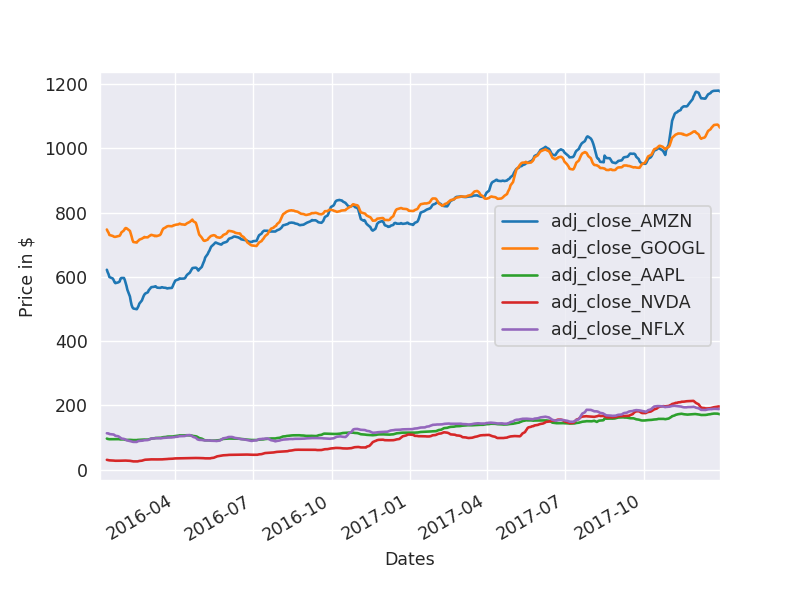

> /home/faisal/Desktop/dsnd/projects/mercatus-machina/src/lib/stocks.py(358)loadMergedData()
-> vzr.visualize(merged.loc[pd.to_datetime(merged.index) >= parser.parse(test_start)][pred_plot_columns], \
(Pdb) merged.index
DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='date', length=502, freq=None)
(Pdb) finance.index
DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2017-12-11', '2017-12-12', '2017-12-13', '2017-12-14',
               '2017-

<IPython.core.display.Javascript object>


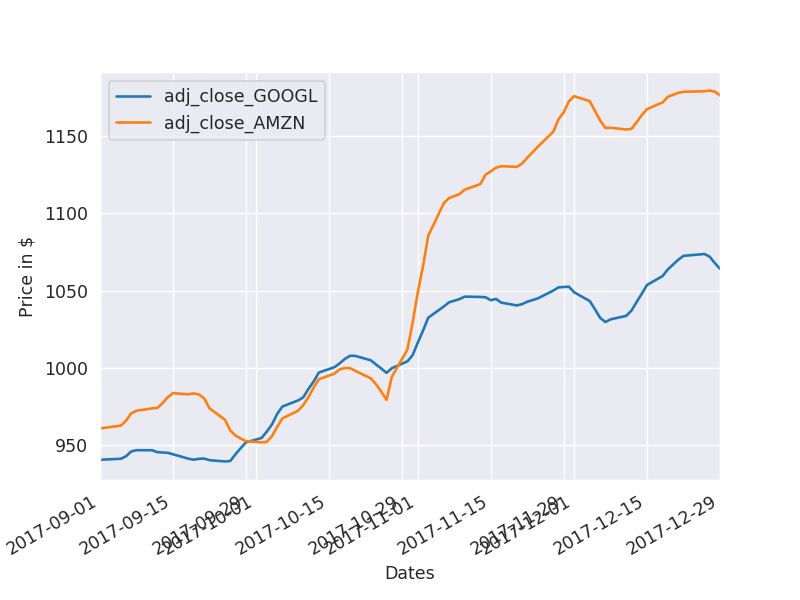

<IPython.core.display.Javascript object>


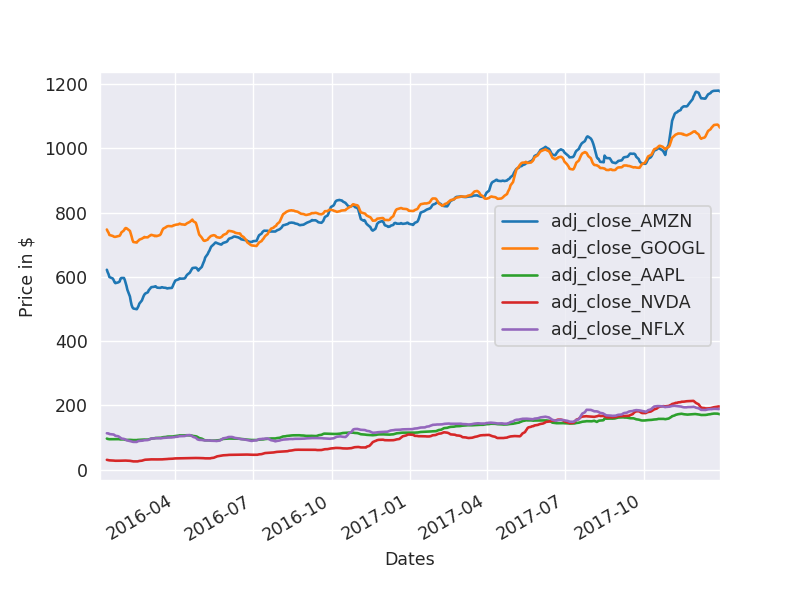

> /home/faisal/Desktop/dsnd/projects/mercatus-machina/src/lib/stocks.py(356)loadMergedData()
-> pdb.set_trace()
(Pdb) c


<IPython.core.display.Javascript object>


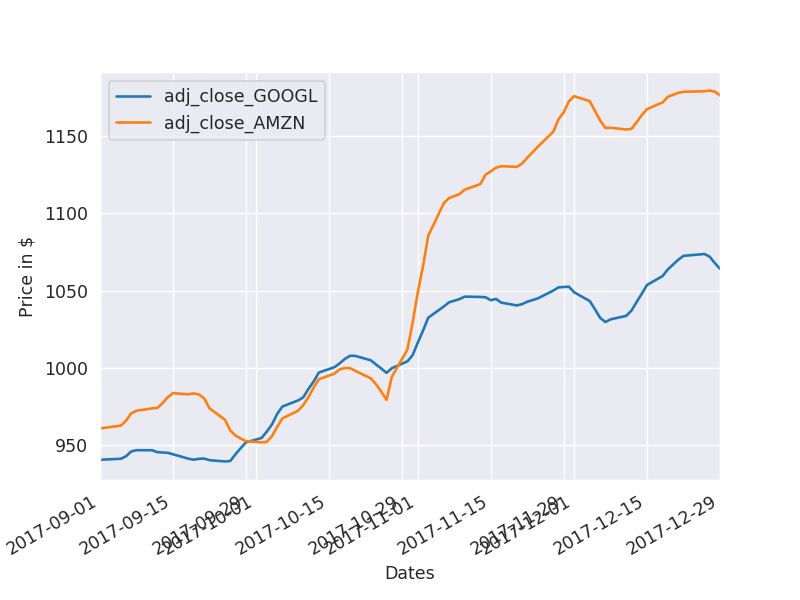

<IPython.core.display.Javascript object>


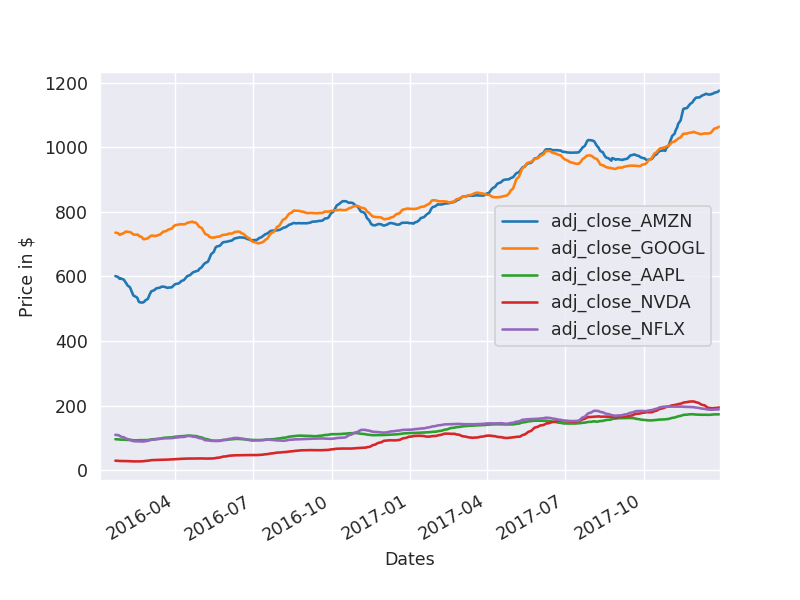

> /home/faisal/Desktop/dsnd/projects/mercatus-machina/src/lib/stocks.py(358)loadMergedData()
-> vzr.visualize(merged.loc[pd.to_datetime(merged.index) >= parser.parse(test_start)][pred_plot_columns], \
(Pdb) c


<IPython.core.display.Javascript object>


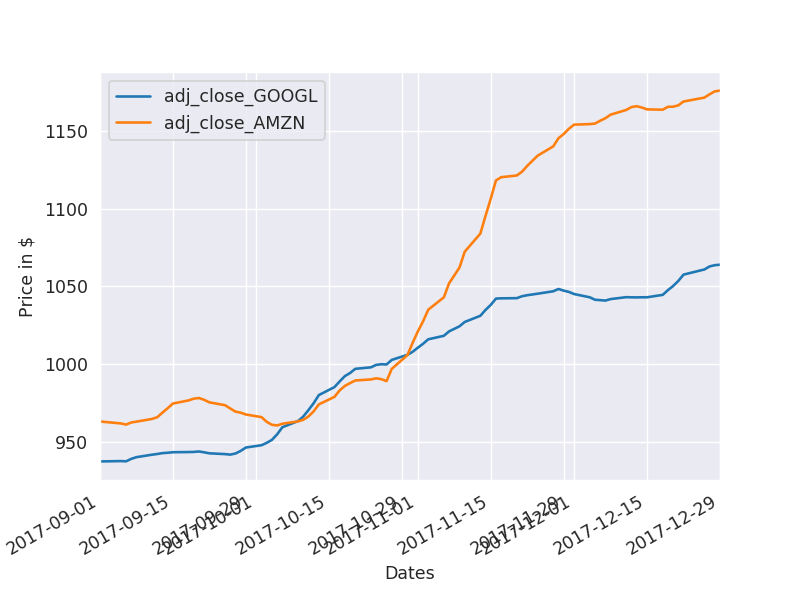

<IPython.core.display.Javascript object>


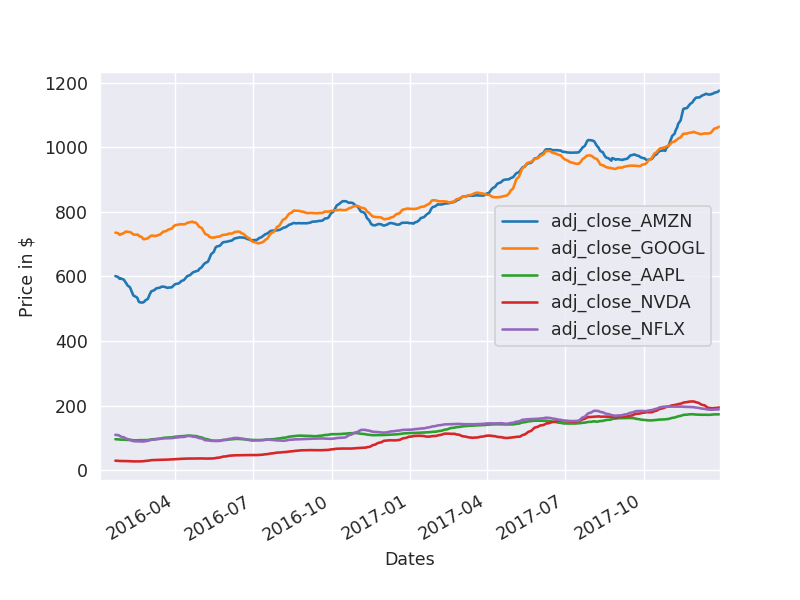

> /home/faisal/Desktop/dsnd/projects/mercatus-machina/src/lib/stocks.py(356)loadMergedData()
-> pdb.set_trace()
(Pdb) c


<IPython.core.display.Javascript object>


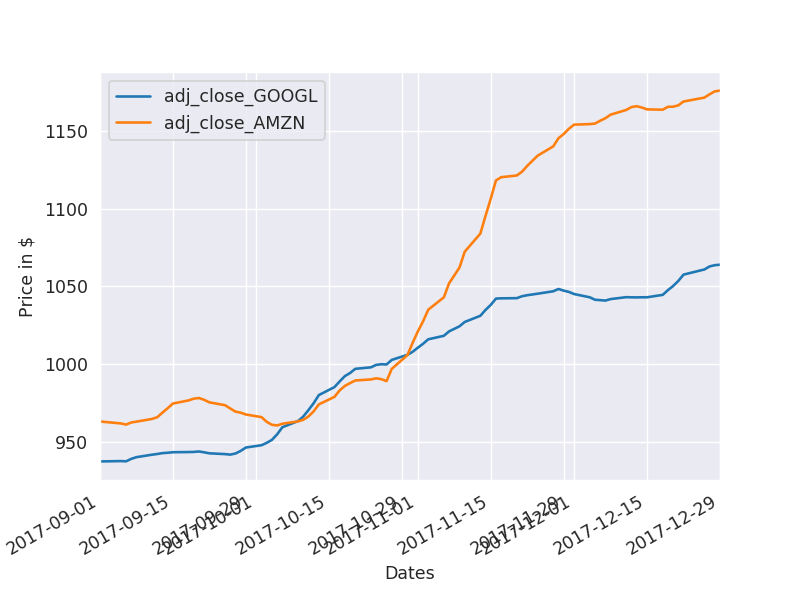

A new trial started with ID: d342175a-2abd-11e9-b524-9cb6d06b490b

The data files generated are:
[(7, 5, '_trials/d342175a-2abd-11e9-b524-9cb6d06b490b/finance_w7_h5.csv'), (7, 10, '_trials/d342175a-2abd-11e9-b524-9cb6d06b490b/finance_w7_h10.csv'), (14, 5, '_trials/d342175a-2abd-11e9-b524-9cb6d06b490b/finance_w14_h5.csv'), (14, 10, '_trials/d342175a-2abd-11e9-b524-9cb6d06b490b/finance_w14_h10.csv')]


In [3]:
# create a directory with a unique ID
TRIAL_ID = uuid.uuid1()
DIRECTORY = "_trials/{}".format(TRIAL_ID)
os.makedirs(DIRECTORY)

print("Loading data for {}...".format(', '.join(TICKERS_TRAIN)))

data_files = st.loadMergedData(
    WINDOWS, HORIZONS, TICKERS_TRAIN, TICKERS_PREDICT,
    DATE_TRAIN_START, DATE_END, DATE_TEST_START, DIRECTORY
)

print("A new trial started with ID: {}\n".format(TRIAL_ID))
print("The data files generated are:")
print(data_files)

Now we create a list of regressors which we would like to use for making predictions:

In [4]:
import lib.tpot_stock_pipeline as tp

classifiers = [
    ('GradientBoosted', MultiOutputRegressor(GradientBoostingRegressor())),
#     ('AdaBoost', MultiOutputRegressor(AdaBoostRegressor()))
    ('TPot', MultiOutputRegressor(tp.get_tpot_pipeline()))
]

Starting an iteration with a horizon of 7 and a window of 5...
Training and testing the GradientBoosted model...


<IPython.core.display.Javascript object>


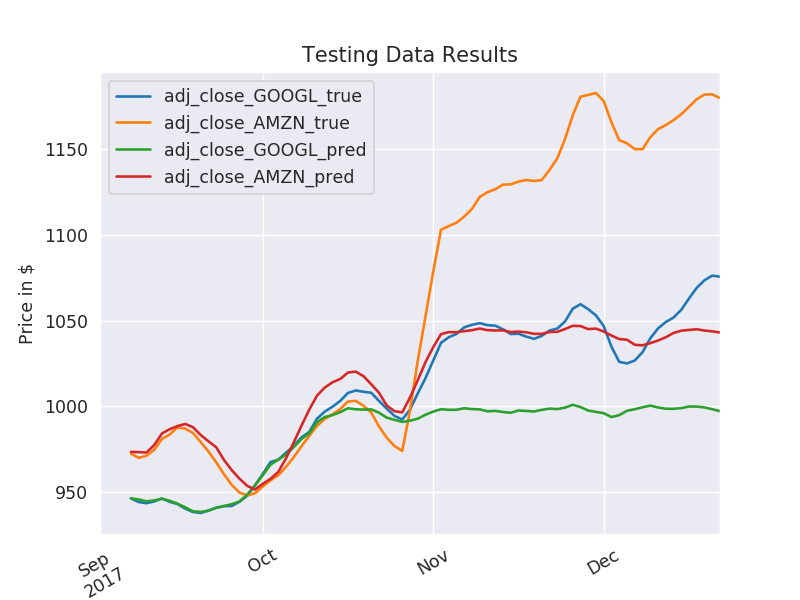

Training and testing the TPot model...


/home/faisal/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=1.797e-01, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/faisal/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 90 iterations, i.e. alpha=8.924e-02, with an active set of 26 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/faisal/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:337: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlle

<IPython.core.display.Javascript object>


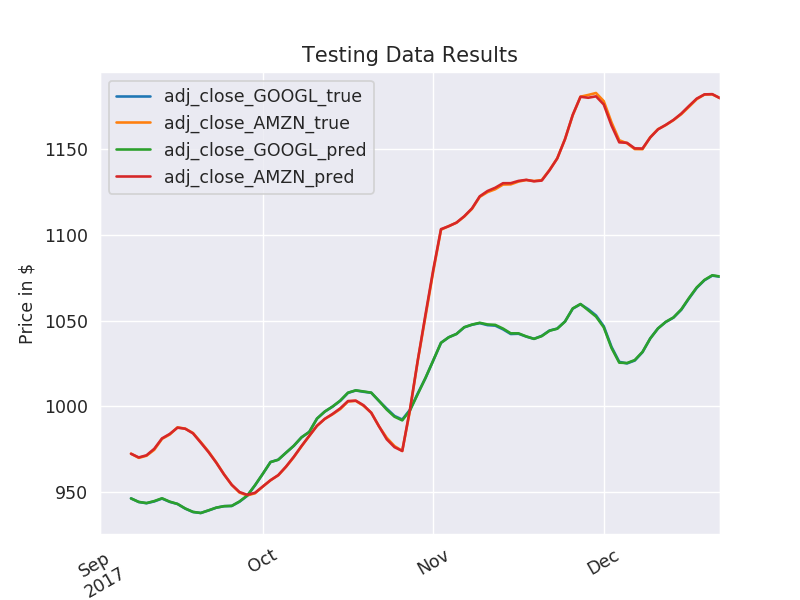

Starting an iteration with a horizon of 7 and a window of 10...
Training and testing the GradientBoosted model...


<IPython.core.display.Javascript object>


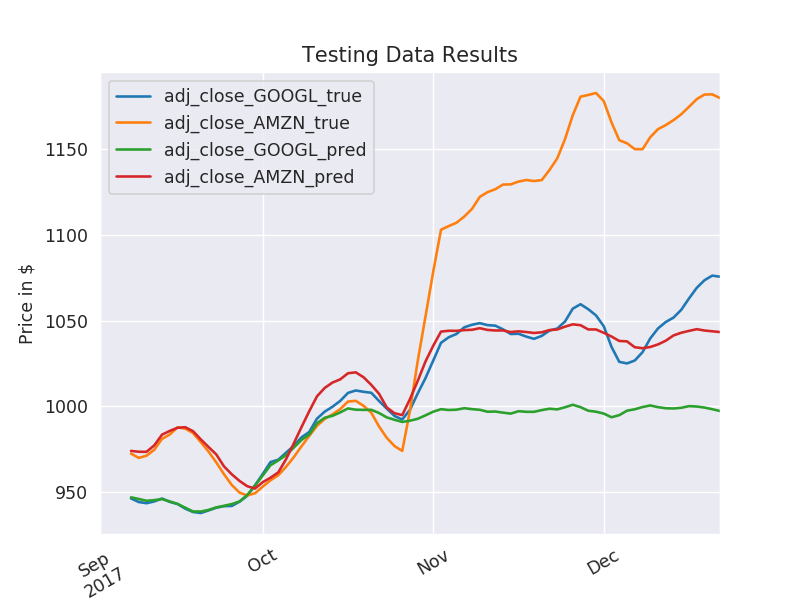

Training and testing the TPot model...


/home/faisal/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=2.449e-01, with an active set of 9 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/faisal/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:337: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 19 iterations, alpha=9.506e-02, previous alpha=9.441e-02, with an active set of 8 regressors.
  ConvergenceWarning)


<IPython.core.display.Javascript object>


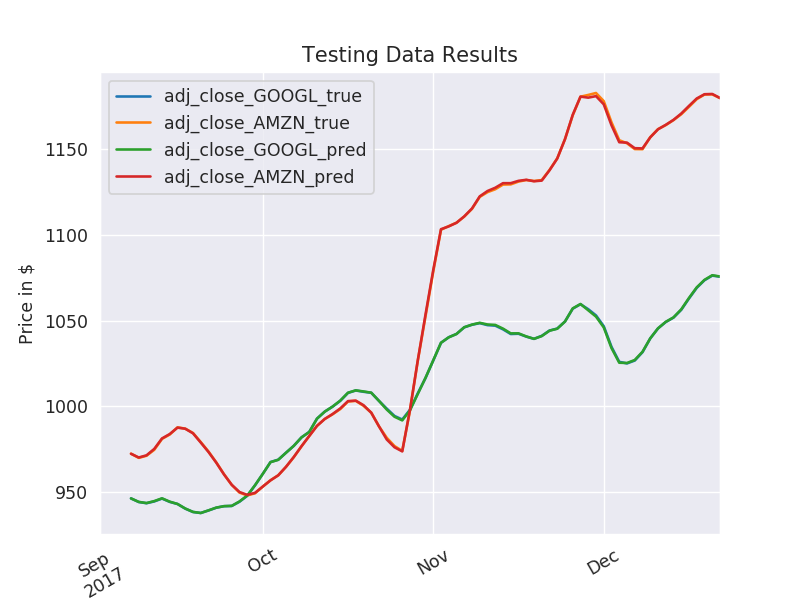

Starting an iteration with a horizon of 14 and a window of 5...
Training and testing the GradientBoosted model...


<IPython.core.display.Javascript object>


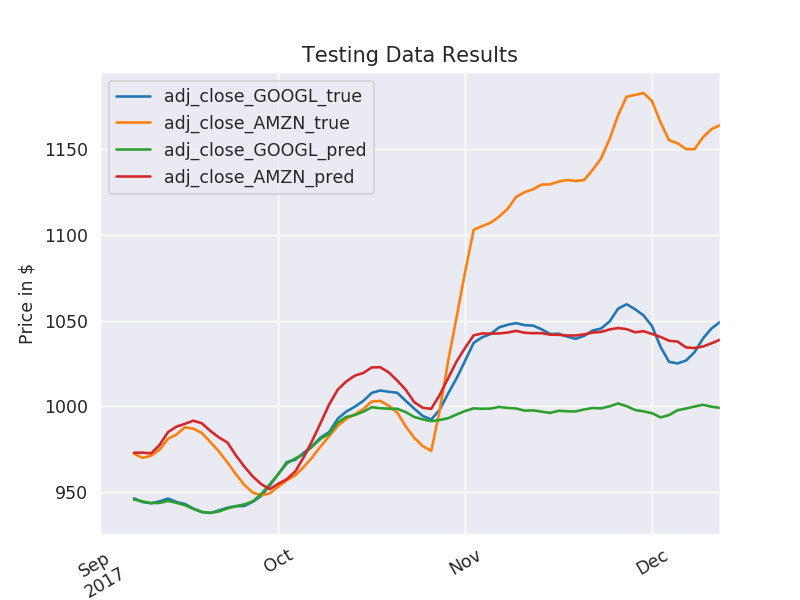

Training and testing the TPot model...


/home/faisal/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=1.797e-01, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/faisal/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:337: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 92 iterations, alpha=8.932e-02, previous alpha=8.932e-02, with an active set of 27 regressors.
  ConvergenceWarning)


<IPython.core.display.Javascript object>


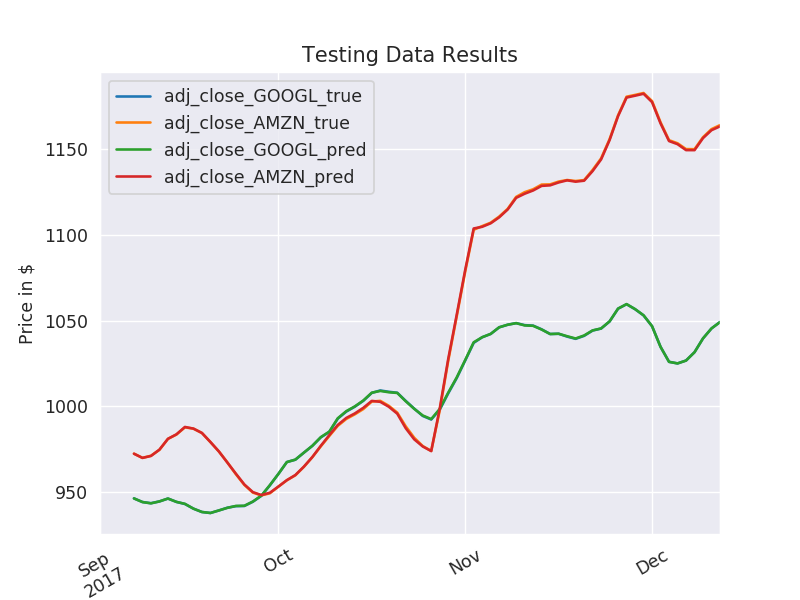

Starting an iteration with a horizon of 14 and a window of 10...
Training and testing the GradientBoosted model...


<IPython.core.display.Javascript object>


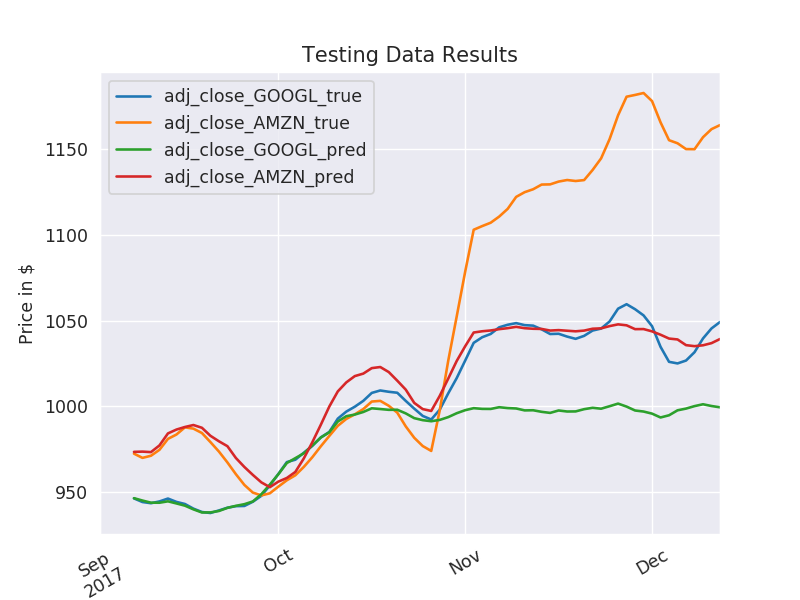

Training and testing the TPot model...


/home/faisal/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=2.449e-01, with an active set of 9 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/faisal/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:337: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 34 iterations, alpha=7.640e-02, previous alpha=7.627e-02, with an active set of 11 regressors.
  ConvergenceWarning)
/home/faisal/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 35 iterations, i.e. alpha=2.168e-02, with an active set of 13 regressors, and

<IPython.core.display.Javascript object>


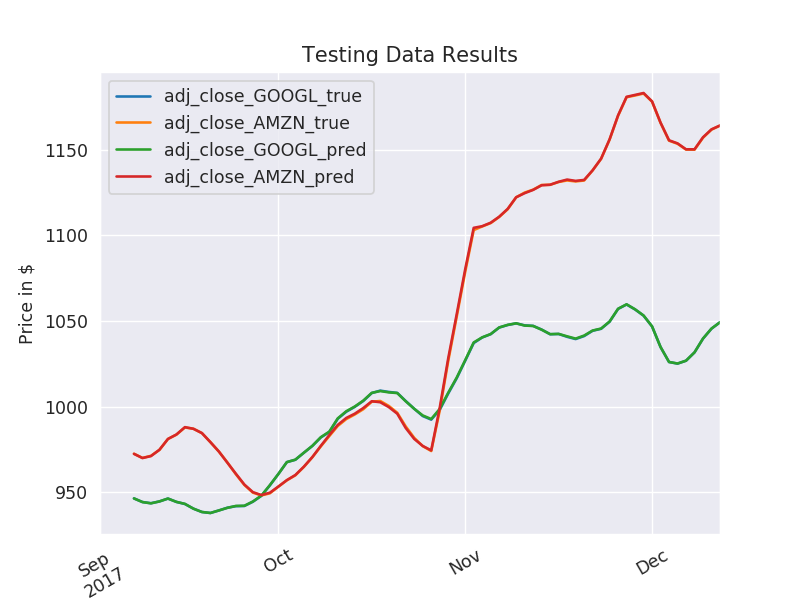

{
    "H7_W5": {
        "cross_validation_GradientBoosted": 2.743,
        "accuracy_GradientBoosted": 3.8614397255482364,
        "cross_validation_TPot": 0.475,
        "accuracy_TPot": 0.05303679981889705,
        "window": 5,
        "horizon": 7,
        "time_lapsed": 16.222387552261353
    },
    "H7_W10": {
        "cross_validation_GradientBoosted": 2.765,
        "accuracy_GradientBoosted": 3.8416703914058026,
        "cross_validation_TPot": 0.427,
        "accuracy_TPot": 0.05146940513546587,
        "window": 10,
        "horizon": 7,
        "time_lapsed": 36.904053688049316
    },
    "H14_W5": {
        "cross_validation_GradientBoosted": 2.803,
        "accuracy_GradientBoosted": 3.4181775974913555,
        "cross_validation_TPot": 0.665,
        "accuracy_TPot": 0.040473670242576684,
        "window": 5,
        "horizon": 14,
        "time_lapsed": 43.69775724411011
    },
    "H14_W10": {
        "cross_validation_GradientBoosted": 2.823,
        "accuracy_Gradient

In [5]:
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

# - combine the results of each classifier along with its w + h into a response object
all_results = {}

# - train each of the models on the data and save the highest performing
#         model as a pickle file
for h, w, file_path in data_files:
    # Start measuing time
    time_start = time.time()
    
    # load data
    finance = pd.read_csv(file_path, encoding='utf-8', header=0)
    finance = finance.set_index(finance.columns[0])
    finance.index.name = 'Date'
    finance.index = pd.to_datetime(finance.index)
    finance.sort_index()
    
    # perform preprocessing
    X_train, y_train, X_test, y_test = \
        st.prepareDataForClassification(finance, DATE_TEST_START, DATE_END, TICKERS_PREDICT, h, w)

    results = {}

    print("Starting an iteration with a horizon of {} and a window of {}...".format(h, w))

    for i, clf_ in enumerate(classifiers):
        print("Training and testing the {} model...".format(clf_[0]))
        
        # perform k-fold cross validation
        results['cross_validation_%s'%clf_[0]] = \
            st.performCV(X_train, y_train, 10, clf_[1], clf_[0])
        
        # perform predictions with testing data and record result
        preds, results['accuracy_%s'%clf_[0]] = \
            st.trainPredictStocks(X_train, y_train, X_test, y_test, clf_[1], DIRECTORY)
        
        for c in preds.columns:
            preds[c] = preds[c].rolling(window=5).mean()

#         print("\nBelow is a sample of of the results:\n")
#         display(preds.sample(5).sort_index().reindex_axis(sorted(preds.columns), axis=1))
            
        # plot results
        vzr.visualize_predictions(preds, title='Testing Data Results')

    results['window'] = w
    results['horizon'] = h

    # Stop time counter
    time_end = time.time()
    results['time_lapsed'] = time_end - time_start

    all_results['H%s_W%s'%(h, w)] = results

print(json.dumps(all_results, indent=4))